Distributed latent representations are what makes deep learning powerful. This paradigm of representation learning isn't new, almost every corner of machine learning is involved with learning some useful representation to do the task in hand. Linear Factor Models are the first kind of representation learning methods, they try to capture the underlying distribution of random varaible 'x' by using a latent variable 'h'.

$$ p_{\text{model}}(x) = \mathbb{E}_{h} p_{\text{model}}(x|h) $$

As the name suggests, linear factor models model the world using a linear affine map.

$$ x = Wh+b+ noise $$

### Probabilistic PCA and Factor Models

* PCA and Factor models are linear representation models following the same logic as above, but only differ in the priors they set on 'h' and the noise term.
* Factor analysis is a way of decomposing a set of input random variables in to a set of factors (latent) that are assumed to capture the dependencies between inputs.
* The name 'factors' is strange, it could be ideally called 'unsupervised linear decomposition' or something along that line.
* We assume that we can model the world using 'h', and we assume that there are some variables which correspond to one aspect of the model which can be clubbed together (factor). These linear combination of factors approximates the input distribution.

$$ x = Wh + b+ z $$
* This is a generative model, you need to set a prior for 'h' so that you can get the posterior. What is the simplest prior you can set? Gaussian? Yes, linear gaussian decomposition is a good name for factor analysis.

$$ p(x_i| h_i) = N(Wh_i +  \mu,  \psi) $$

$$ p(x_i) = N( \mu, WW^T +  \psi) $$
* Depending on how you choose to model the variance, FA and PCA will come up.
* With FA, you can scale each variable with seperate variances.
* Very naive way of doing things, but interpretable when you have a small dataset.
* ** Proababilistic PCA: ** The prior set on Prob. PCA is simple enough to understand, most variable in the data do not have a variance in all directions, you could get away with an efficient representation if you can capture where most variance is exhibited.

$$ x = Wh+b+\sigma z $$

### Independent Component Analysis

* The idea in ICA is so unique that it makes me wonder why it is so unused. In PCA, we try to come up with a representation that is as decorrelated as possible. ICA tries to decompose the input distribution into independent components.
* My favorite usecase of ICA is when using faces dataset. When you think about what PCA is actually doing, the first few components in it should represent maximum variance in the data. Surprizingly on image data, we would expect the 1-2 components capture the maximum variance i.e faces in the data. It turns out that the maximum variance in images is typically the brightness or darkness. So, the first few components really doesn't capture anything related to faces, but represents the averaged brightness/darkness in the given data. On other hand, ICA tries to capture independent components like nose, hair etc. when applied to the same dataset.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

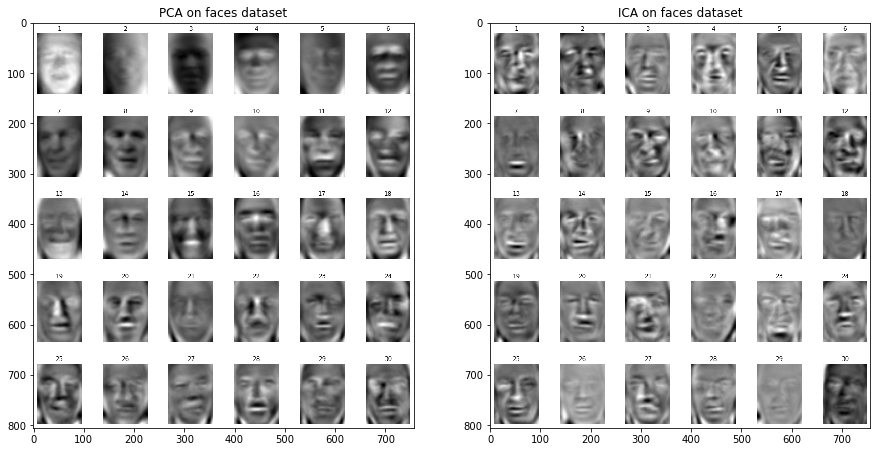

In [7]:
fig = plt.figure(figsize=(15,9))
a=fig.add_subplot(1,2,1)
i = plt.imread('images/pca.png')
plt.imshow(i)
a.set_title('PCA on faces dataset')
b=fig.add_subplot(1,2,2)
i2 = plt.imread('images/ica.png')
plt.imshow(i2)
b.set_title('ICA on faces dataset')

* Separating audio signals by speakers: ICA can take the mixed signal, and maximize for independence between features, this will give separated audio.
* Any field in which you typically find multiple signals confounding each other, you can use ICA.
* ICA can be generalized to nonlinear generative models, there has been some work recently in this area.

### Slow feature analysis

* The underlying principle on SFA is quite intuitive, important features in the data change very slowly with respect to time, for example, consider a zebra moving in a particular direction. Becasue of the B&W patterns, the underlying position of whites and blacks might change rapidly. But, the zebra could still be in the image. 
* Why can't we add one more term in loss function that penalizes local changes in the image? 

$$ \lambda \sum_{t} L(f(x^{(t+1)}, f(x^{(t)}) $$
* SFA is reasonably good at mimicing the brain, activations in SFA look like the ones in brain neuron cell activations in V1 region. ( I can't honestly believe how many times this shows up as a proof of learning something that mimics brain.!)
* SFA is also never used in any state of the art deep learning model. We don't know why this happens, explicitly asking loss function to regularize for local changes is asking it neglect too much of information, and book also mentions the same thing.

### Sparse Coding

* Very popular for some reason, decomposing the signal into basis functions. You can think of sparse coding as an linear encoder that can be learned. Unlike in communication systems where you try to come up with a fixed encoder that can be used to encode the signal, this encoder is a learnable algorithm that can be used to train an efficient linear representation of the inputs.
* Follows the same logic as other linear factor models, assume the linear decompostion with some noise element. Using maximum likelihood to train these models is not tractable.
* The training procedure (much like the energy based models) alternate between encoding the data and at the same time training the decoder to minimize reconstruction error.
* We want to directly optimize h given x.

$$ h^* = {argmax}_h P(h|x) $$

$$  h^* = {argmax}_h log(P(h|x)) $$

$$ h^* = {argmin}_h \lambda |h| + \beta (|x-Wh|)^2 $$

* This optimization forces sparse solutions because of the regularization. For training we alternate between minimizing weights to reduce reconstruction error and minimizing h.

* It seems to produce noisy samples, as it is an iterative algorithm and priors set on h could be very harsh on it.

### Manifold interpretation of PCA

* All these linear models can be interpreted as learning a manifold.
* PCA can be viewed as a pancake alligned in a particular direction in a manifold. 